# INTRODUCTION

This project aims to to explore a large dataset of air pollution measurements from OpenAQ's database.

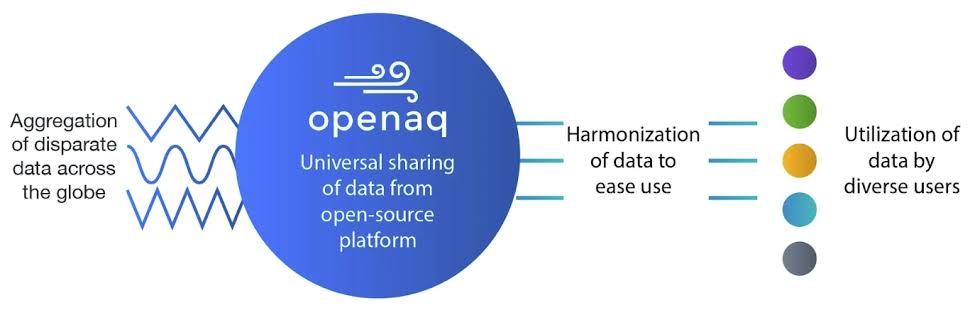



### Table of Content:
- INTRODUCTION
- BODY
    - OVERVIEW
    - ASSESSMENTS 
- REFERENCES

### Tools Utilized:
- Python
- SQL
- OpenAQ API
- Google BigQuery
- Kaggle Notebook

[@samkaggle99](https://www.github.com/samkroft)

This project was written in a Kaggle Notebook Environment and utilizes Kaggle feedback system which is setup for making API calls to its public dataset and Google BigQuery.

You can personally set up google cloud console for authentication in order to make custom request but it expires after the period of free trails, hence immediate charges for subscriptions are followed after free trials.

---

---

### Overview
This project utilizes foundational commands of SQL, as well as Google BigQuery, to sort through OpenAQ’s large datasets and analyze large air pollution and global air quality data. From this project, I learned how make API requests to Google BigQuery, through a constructed reference to Google Big-Query’s client object. I optimized the queries with respect to the number of API requests for datasets conveying cities, countries, pollutant, unit, longitude, latitude and a few more others. 

These optimizations helped reduce loading time, improve code efficiency and cut operational cost of cloud microservices. Through the analysis, I was able to determine which locations had high pollution levels as well as low to zero pollution levels, thus distinguishing the places with high air quality from those with low air quality, suggesting the need for shift or diversion of attention to aid remediation. 

These my acquired skills are a solid fundamental in structured query languages, that are transferable to handling structured spatial databases. 

---


---

### Assessments 
#### Fetch OpenAQ dataset

The code cell below fetches the `global_air_quality` table from the `openaq` dataset.  

For the purpose of write efficient and cost effective queries, we will limit preview to the first five rows of the table.

---

In [4]:
from google.cloud import bigquery

# Create a "Client" object
client = bigquery.Client()

# Construct a reference to the "openaq" dataset
dataset_ref = client.dataset("openaq", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# Construct a reference to the "global_air_quality" table
table_ref = dataset_ref.table("global_air_quality")

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the "global_air_quality" table
client.list_rows(table, max_results=5).to_dataframe()

Using Kaggle's public dataset BigQuery integration.


,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours,location_geom
0,"Borówiec, ul. Drapałka",Borówiec,PL,bc,0.85217,2022-04-28 07:00:00+00:00,µg/m³,GIOS,1.0,52.276794,17.074114,POINT(52.276794 1)
1,"Kraków, ul. Bulwarowa",Kraków,PL,bc,0.91284,2022-04-27 23:00:00+00:00,µg/m³,GIOS,1.0,50.069308,20.053492,POINT(50.069308 1)
2,"Płock, ul. Reja",Płock,PL,bc,1.41000,2022-03-30 04:00:00+00:00,µg/m³,GIOS,1.0,52.550938,19.709791,POINT(52.550938 1)
3,"Elbląg, ul. Bażyńskiego",Elbląg,PL,bc,0.33607,2022-05-03 13:00:00+00:00,µg/m³,GIOS,1.0,54.167847,19.410942,POINT(54.167847 1)
4,"Piastów, ul. Pułaskiego",Piastów,PL,bc,0.51000,2022-05-11 05:00:00+00:00,µg/m³,GIOS,1.0,52.191728,20.837489,POINT(52.191728 1)


---

### Assesments: Units of Measurement

- Here, we aim to access which countries have reported pollution levels in units of "ppm". 

- In the code cell below, we set `first_query` to an SQL query that pulls the appropriate entries from the `country` column.

---

In [5]:
# Query to select countries with units of "ppm"

first_query = """
              SELECT country
              FROM `bigquery-public-data.openaq.global_air_quality`
              WHERE unit = "ppm"
              """

# To get each country just once, add the "DINSTICT" keyword as in "SELECT DISTINCT country"

# Set up the query 
# quota limit on kaggle notebook for each user is set to 10 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
first_query_job = client.query(first_query, job_config=safe_config)

# API request - run the query, and return a pandas DataFrame
first_results = first_query_job.to_dataframe()

# View firts five rows
print(first_results.head())

  country
0      AR
1      IL
2      IL
3      AR
4      AR
You got the right countries. Nice job! Some countries showed up many times in the results. To get each country only once you can run `SELECT DISTINCT country ...`. The DISTINCT keyword ensures each column shows up once, which you'll want in some cases.


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

---

### Assessment: High Air Quality Determination

Here, we determine which pollution levels were reported to be exactly zero (0). 

To achieve this, we:
- Set `zero_pollution_query` to select **all columns** of the rows where the `value` column is 0.
- Set `zero_pollution_results` to a pandas DataFrame containing the query results.

---

In [10]:
# Query to select all columns where pollution levels are exactly 0

zero_pollution_query = """
                        SELECT *
                        FROM `bigquery-public-data.openaq.global_air_quality`
                        WHERE value=0
                       """ 

# Set up the query
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(zero_pollution_query, job_config=safe_config)

# API request - run the query and return a pandas DataFrame
zero_pollution_results = query_job.to_dataframe() 

print(zero_pollution_results.head())

                       location      city country pollutant  value  \
0     Zielonka, Bory Tucholskie  Zielonka      PL        bc    0.0   
1    Toruń, ul. Przy Kaszowniku     Toruń      PL        bc    0.0   
2           Kielce, ul. Targowa    Kielce      PL        bc    0.0   
3     Zielonka, Bory Tucholskie  Zielonka      PL        bc    0.0   
4  Koszalin, ul. Armii Krajowej  Koszalin      PL        bc    0.0   

                  timestamp   unit source_name  latitude  longitude  \
0 2022-04-29 14:00:00+00:00  µg/m³        GIOS       1.0  53.662136   
1 2022-04-19 04:00:00+00:00  µg/m³        GIOS       1.0  53.017628   
2 2022-05-07 17:00:00+00:00  µg/m³        GIOS       1.0  50.878998   
3 2022-05-19 14:00:00+00:00  µg/m³        GIOS       1.0  53.662136   
4 2022-05-12 20:00:00+00:00  µg/m³        GIOS       1.0  54.193986   

   averaged_over_in_hours       location_geom  
0               17.933986  POINT(53.662136 1)  
1               18.612808  POINT(53.017628 1)  
2       

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

---

# REFERENCES
---
- [OpenAQ](https://www.openaq.org)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)
- [Dansbecker](https://www.kaggle.com/dansbecker/select-from-where)

---